In [1]:
from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster
# from colorthief import ColorThief
import fast_colorthief
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio

https://stackoverflow.com/questions/51923503/why-do-some-images-have-third-dimension-3-while-others-have-4/51931395

In [2]:
colors_df = pd.read_csv("colors_filtered_df.csv")
colors_df.head()

,image_file,dominant_color,image_shape,image_dimension,x,y,z
0,Nexus_Image_Iterator/full_sprial_grids_55_.png,"(49, 46, 47)","(6084, 6084, 3)",3,49,46,47
1,Nexus_Image_Iterator/grid_sprial_test_3_.png,"(4, 4, 4)","(6084, 6084, 3)",3,4,4,4
2,Nexus_Image_Iterator/more_compressedfull_spria...,"(4, 4, 4)","(338, 338, 3)",3,4,4,4
3,Nexus_Image_Iterator/back_forth_grid_69_.png,"(4, 4, 4)","(6084, 6084, 3)",3,4,4,4
4,Nexus_Image_Iterator/more_compressedfull_spria...,"(151, 135, 131)","(507, 507, 3)",3,151,135,131


In [3]:
def color_tuple(row):
    return (int(row["x"]), int(row["y"]), int(row["z"]))

colors_df["image_shape"] = colors_df.apply(lambda row: color_tuple(row), axis=1)

colors_df["image_shape"][0]

(49, 46, 47)

In [4]:
image_folder = "Nexus_Image_Iterator/"
image_files = glob.glob("Nexus_Image_Iterator/"+"*.png") + glob.glob("Nexus_Image_Iterator_copy_6/"+"*.png") + glob.glob("Image_Image_Iterator/"+"*.png")
image_colors = []

for image_filename in image_files:
    # color_thief = ColorThief(image_filename)
    # get the dominant color
    try:
        dominant_color = fast_colorthief.get_dominant_color(image_filename, quality=1)
        print(dominant_color)
        image_colors.append(dominant_color)
    except:
        print("Error")
        image_colors.append("error")
    
colors_df = pd.DataFrame({"image_file":image_files,
                         "dominant_color": image_colors})

colors_df.head()

(49, 46, 47)
(4, 4, 4)
(4, 4, 4)
(4, 4, 4)
(151, 135, 131)
(143, 148, 162)
(188, 172, 161)
(172, 144, 145)
(127, 113, 109)
(111, 91, 80)
(120, 121, 90)
(4, 4, 4)
(177, 171, 144)
(132, 136, 149)
(138, 133, 131)
(112, 81, 75)
(4, 4, 4)
(129, 115, 113)
(130, 115, 118)
(140, 109, 110)
(155, 141, 139)
(155, 137, 132)
(4, 4, 4)
(168, 146, 153)
(4, 4, 4)
(144, 141, 138)
(132, 87, 68)
(162, 154, 137)
(151, 136, 133)
(4, 4, 4)
(11, 10, 10)
(15, 14, 14)
(168, 148, 146)
(4, 4, 4)
(12, 11, 11)
(137, 124, 124)
(12, 12, 12)
(151, 135, 131)
(128, 115, 112)
(73, 46, 47)
(152, 135, 131)
(70, 82, 93)
(153, 137, 133)
(82, 62, 49)
(4, 4, 4)
(4, 4, 4)
(140, 140, 147)
(117, 105, 97)
(14, 13, 13)
(156, 141, 140)
(152, 139, 138)
(128, 115, 112)
(4, 4, 4)
(99, 96, 89)
(156, 141, 139)
(155, 138, 134)
(155, 137, 132)
(140, 113, 107)
(155, 137, 132)
(4, 4, 4)
(117, 126, 133)
(4, 4, 4)
(143, 148, 161)
(171, 140, 127)
(132, 120, 122)
(156, 141, 139)
(4, 4, 4)
(4, 4, 4)
(148, 134, 139)
(89, 84, 87)
(149, 124, 136)
(

(4, 4, 4)
(133, 133, 140)
(151, 135, 133)
(146, 116, 93)
(12, 11, 11)
(94, 111, 112)
(73, 46, 47)
(137, 124, 124)
(13, 12, 12)
(13, 13, 12)
(50, 46, 47)
(4, 4, 4)
(4, 4, 4)
(14, 14, 13)
(105, 106, 106)
(132, 88, 72)
(4, 4, 4)
(152, 135, 131)
(117, 126, 133)
(157, 140, 134)
(4, 4, 4)
(144, 116, 115)
(14, 13, 13)
(152, 139, 138)
(155, 137, 132)
(156, 138, 132)
(4, 4, 4)
(13, 12, 12)
(124, 109, 116)
(153, 137, 133)
(161, 143, 127)
(162, 107, 99)
(170, 149, 143)
(13, 12, 12)
(4, 4, 4)
(146, 114, 106)
(4, 4, 4)
(11, 11, 11)
(14, 13, 13)
(137, 124, 124)
(4, 4, 4)
(117, 123, 147)
(11, 10, 10)
(4, 4, 4)
(143, 148, 161)
(39, 37, 37)
(10, 10, 10)
(147, 113, 105)
(138, 127, 120)
(152, 135, 130)
(145, 106, 102)
(148, 145, 151)
(143, 148, 161)
(13, 12, 12)
(134, 132, 140)
(56, 55, 34)
(4, 4, 4)
(4, 4, 4)
(105, 80, 82)
(160, 133, 123)
(145, 130, 131)
(151, 136, 133)
(154, 123, 85)
(156, 138, 132)
(14, 14, 13)
(12, 12, 12)
(13, 13, 12)
(164, 146, 142)
(158, 155, 160)
(99, 96, 89)
(152, 136, 131)
(123

(169, 156, 151)
(143, 141, 144)
(11, 10, 10)
(4, 4, 4)
(164, 146, 142)
(154, 138, 134)
(142, 107, 100)
(14, 14, 13)
(136, 124, 124)
(4, 4, 4)
(134, 112, 114)
(12, 11, 11)
(150, 134, 139)
(157, 140, 134)
(120, 99, 105)
(89, 90, 95)
(156, 138, 134)
(119, 113, 123)
(4, 4, 4)
(75, 78, 83)
(166, 142, 140)
(153, 137, 133)
(150, 134, 131)
(148, 97, 84)
(122, 114, 105)
(4, 4, 4)
(152, 139, 138)
(4, 4, 4)
(139, 139, 143)
(156, 139, 136)
(4, 4, 4)
(143, 148, 161)
(119, 100, 104)
(39, 37, 37)
(4, 4, 4)
(155, 137, 132)
(4, 4, 4)
(117, 135, 159)
(110, 89, 81)
(186, 133, 115)
(146, 143, 150)
(153, 137, 132)
(156, 138, 134)
(4, 4, 4)
(11, 10, 10)
(162, 162, 166)
(4, 4, 4)
(120, 112, 105)
(162, 132, 128)
(12, 11, 11)
(14, 13, 13)
(170, 149, 143)
(138, 138, 142)
(31, 4, 14)
(20, 19, 20)
(143, 115, 118)
(4, 4, 4)
(143, 148, 161)
(156, 132, 124)
(170, 133, 124)
(152, 135, 130)
(169, 149, 142)
(156, 140, 138)
(155, 128, 101)
(12, 11, 11)
(15, 14, 14)
(156, 141, 139)
(151, 135, 133)
(134, 110, 104)
(14, 13

,image_file,dominant_color
0,Nexus_Image_Iterator/full_sprial_grids_55_.png,"(49, 46, 47)"
1,Nexus_Image_Iterator/grid_sprial_test_3_.png,"(4, 4, 4)"
2,Nexus_Image_Iterator/more_compressedfull_spria...,"(4, 4, 4)"
3,Nexus_Image_Iterator/back_forth_grid_69_.png,"(4, 4, 4)"
4,Nexus_Image_Iterator/more_compressedfull_spria...,"(151, 135, 131)"


In [5]:
def nearest_color(color, df):
    colors_list = df.dominant_color.unique()
    distances = []
    for img_color in colors_list:
        a = np.array(img_color)
        b = np.array(color)
        distances.append(np.linalg.norm(a-b))
    closest_index = distances.index(min(distances))
    return df[df["dominant_color"]==colors_list[closest_index]]

In [6]:
def pixelate_rgb(img, window):
    n, m, _ = img.shape
    n, m = n - n % window, m - m % window
    img1 = np.zeros((n, m, 3))
    for x in range(0, n, window):
        for y in range(0, m, window):
            img1[x:x+window,y:y+window] = img[x:x+window,y:y+window].mean(axis=(0,1))
    return img1

In [7]:
# save every row

def pixelate_rgb_nexus_rows(file, window):
    img = plt.imread(file)
    print(img.shape)
    n, m, _ = img.shape
    n, m = n - n % window, m - m % window
    img1 = np.zeros((n, m, 3))
    nexus_img = img.copy()
    print(nexus_img.shape)
    i = 0
    for x in range(0, n, window):
        for y in range(0, m, window):
            img1[x:x+window,y:y+window] = img[x:x+window,y:y+window].mean(axis=(0,1))
#             print(255*img[x:x+window,y:y+window].mean(axis=(0,1)))
            nearest_color_df = nearest_color(255*img[x:x+window,y:y+window].mean(axis=(0,1)), colors_df[colors_df["dominant_color"]!="error"])
#             print(nearest_color_df["image_file"].values[0])
            replace_img = Image.open(nearest_color_df["image_file"].values[0])
#             print(replace_img.size)
            replace_img = replace_img.resize((window, window), Image.ANTIALIAS)
            replace_img.save("replace_img.png")
#             print(nexus_img.shape)
            nexus_img[x:x+window,y:y+window] = plt.imread("replace_img.png")[:, :, :3] 
            if y%m == 0 or (y==m-window and x==m-window):
                print(i)
                print(x,y)
                plt.imshow(nexus_img)
                plt.axis('off')
                plt.savefig(file.replace(".png", "_nexus_" + str(i) + ".png"), bbox_inches='tight', dpi=300)
                i +=1
    return img1, nexus_img

In [8]:
def resize(file):
    im = Image.open(file)
    new_im = im.resize((507,507), Image.ANTIALIAS)
    new_im.save(file.replace(".png", '_resized.png'))
    return file.replace(".png", '_resized.png')

### Find correct ratio

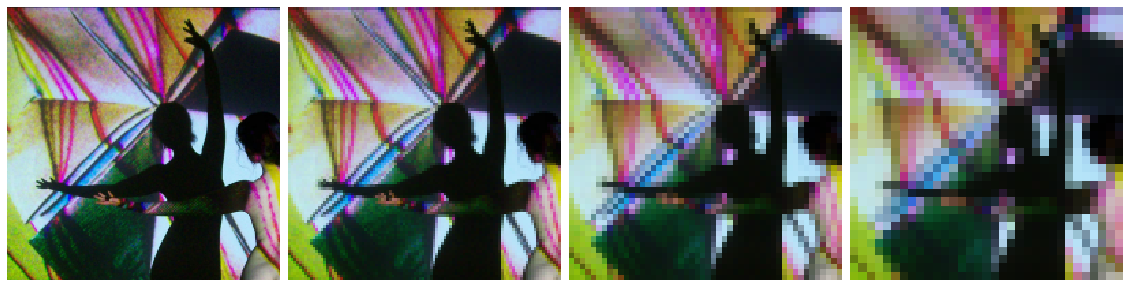

In [17]:
file = "quinn_dance_two/9401.png"
img = plt.imread(file)

fig, ax = plt.subplots(1, 4, figsize=(20,10))

ax[0].imshow(pixelate_rgb(img, 5))
ax[1].imshow(pixelate_rgb(img, 10))
ax[2].imshow(pixelate_rgb(img, 20))
ax[3].imshow(pixelate_rgb(img, 30))

# remove frames
[a.set_axis_off() for a in ax.flatten()]
plt.subplots_adjust(wspace=0.03, hspace=0)

In [18]:
img.size

3000000

(1000, 1000, 3)
(1000, 1000, 3)
0
0 0
1
20 0
2
40 0
3
60 0
4
80 0
5
100 0
6
120 0
7
140 0
8
160 0
9
180 0
10
200 0
11
220 0
12
240 0
13
260 0
14
280 0
15
300 0
16
320 0
17
340 0
18
360 0
19
380 0
20
400 0
21
420 0
22
440 0
23
460 0
24
480 0
25
500 0
26
520 0
27
540 0
28
560 0
29
580 0
30
600 0
31
620 0
32
640 0
33
660 0
34
680 0
35
700 0
36
720 0
37
740 0
38
760 0
39
780 0
40
800 0
41
820 0
42
840 0
43
860 0
44
880 0
45
900 0
46
920 0
47
940 0
48
960 0
49
980 0
50
980 980


(-0.5, 999.5, 999.5, -0.5)

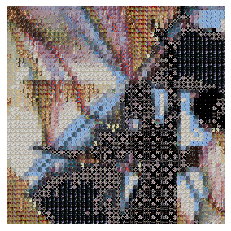

In [19]:
pixals_img, nexus_img = pixelate_rgb_nexus_rows(file, 20)
plt.imshow(nexus_img)
plt.axis('off')

In [20]:
# make gif!! 

images_in_order = glob.glob(file.replace(".png","*.png"))
images_in_order.remove(file)
number_images_in_order = [x.replace(file.replace(".png",""), "").replace(".png", "").replace("_nexus_", "") for x in images_in_order]
number_images_in_order = [int(x) if x != "" else 0 for x in number_images_in_order]
image_files_df = pd.DataFrame({"image_name":images_in_order,
             "order_number":number_images_in_order}).sort_values("order_number")

with imageio.get_writer(file.replace(".png", "_nexus.gif"), mode='I') as writer:
    for filename in list(image_files_df["image_name"]) + list(image_files_df["image_name"])[::-1]:
        try:
            image = imageio.imread(filename)
            writer.append_data(image)
        except:
            print(filename)

In [21]:
# make smaller gif!! 

# images_in_order = glob.glob(file.replace(".png","*.png"))
# images_in_order.remove(file)

resized_images_in_order = []
for image in images_in_order:
    resized_images_in_order.append(resize(image))
# number_images_in_order = [x.replace(file.replace(".png",""), "").replace(".png", "").replace("_nexus_", "") for x in images_in_order]
# number_images_in_order = [int(x) if x != "" else 0 for x in number_images_in_order]

image_files_df = pd.DataFrame({"image_name":images_in_order,
                               "resized_image_name": resized_images_in_order,
                               "order_number":number_images_in_order}).sort_values("order_number")

with imageio.get_writer(file.replace(".png", "resized_nexus.gif"), mode='I') as writer:
    for filename in list(image_files_df["resized_image_name"]) + list(image_files_df["resized_image_name"])[::-1]:
        try:
            image = imageio.imread(filename)
            writer.append_data(image)
        except:
            print(filename)

In [22]:
# make smaller gif!! 

# images_in_order = glob.glob(file.replace(".png","*.png"))
# images_in_order.remove(file)

# resized_images_in_order = []
# for image in images_in_order:
#     resized_images_in_order.append(resize(image))
# number_images_in_order = [x.replace(file.replace(".png",""), "").replace(".png", "").replace("_nexus_", "") for x in images_in_order]
# number_images_in_order = [int(x) if x != "" else 0 for x in number_images_in_order]

image_files_df = pd.DataFrame({"image_name":images_in_order,
                               "resized_image_name": resized_images_in_order,
                               "order_number":number_images_in_order}).sort_values("order_number")

with imageio.get_writer(file.replace(".png", "resized_reversed_nexus.gif"), mode='I') as writer:
    for filename in list(image_files_df["resized_image_name"])[::-1] + list(image_files_df["resized_image_name"]):
        try:
            image = imageio.imread(filename)
            writer.append_data(image)
        except:
            print(filename)